Adam Dusenbery - Extra Credit

# Analyzing The Pythagorean Expectation in the NFL 

For anyone familiar with sports analytics, the Pythagorean Expectation is typically the first and most famous formula introduced. The theorem is simple enough, (although unfortunately misnamed):

Win Ratio = (Points Scored)^2 / ((Points scored^2) + (Points Allowed^2)

This ratio can be used to calculate a teams 'expected' win rate in a single season with a variation of accuracy depending on the sport being analyzed.

In our case, we will be analyzing Professional American Football (NFL) teams from the past two decades. And to begin we'll load in our dataset. Our Objective is thus: Is this formula accurate in use for the NFL, and if so, how accurate is it?

In [26]:
import pandas as pd
NFL_Data = pd.read_csv('sportsref_download')
NFL_Data = NFL_Data.sort_values(by = ['Year','Team'])
NFL_Data.head()

,Team,Year,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Last_Season_W,Last_Season_L,Last_Season_T,Last_Season_PF,Last_Season_PA,Last_Season_PD
512,Arizona Cardinals,2003,4,12,0,0.250,225,452,-227,-14.2,1.6,-12.6,-6.3,-6.2,5,11,0,262,417,-155
513,Atlanta Falcons,2003,5,11,0,0.313,299,422,-123,-7.7,0.3,-7.4,-2.0,-5.4,9,6,1,402,314,88
514,Baltimore Ravens,2003,10,6,0,0.625,391,281,110,6.9,-0.6,6.3,3.3,3.0,7,9,0,316,354,-38
515,Buffalo Bills,2003,6,10,0,0.375,243,279,-36,-2.3,1.3,-1.0,-5.0,4.0,8,8,0,379,397,-18
516,Carolina Panthers,2003,11,5,0,0.688,325,304,21,1.3,-2.2,-0.9,-1.5,0.6,7,9,0,258,302,-44


# Cleaning/Prepping the Data:

Because I compiled the imported data myself, I know which parts of the data are already 'clean'.

For instance, team names have slight variation over the past 20 years, the Los Angeles Chargers were once the San Diego Chargers, and the LA Rams were once the St. Louis Rams. This variation was already accounted for when the data was compiled, so each team name goes by one standardized name throughout the entire dataset.

There is another aspect of the data that needs to be taken care of however. If you notice from the above output. The data is listed by team name as well as the year they played. For the purposes of our analysis, we need to examine each team separately, on a year by year basis. My strategy for this was dividing each team into a dictionary key, where the values would be the dataframe containing all the above data for that specific team.

In [27]:
teams_dict = dict()
for x in range(32):
    team_name = NFL_Data.iloc[x]['Team']
    team_mask = NFL_Data['Team'] == team_name
    team_data = NFL_Data[team_mask]
    team_data = team_data.drop('Team', axis = 1)
    teams_dict[team_name] = team_data

Running the above code will give us a new variable, teams_dict. Upon inspecting the dictionary we find the keys containing all 32 teams and inspecting the values of one of the keys should produce a dataframe. To pick an example team to display, we'll use my favorite NFL team, the Miami Dolphins.

In [28]:
teams_dict.keys()

dict_keys(['Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens', 'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears', 'Cincinnati Bengals', 'Cleveland Browns', 'Dallas Cowboys', 'Denver Broncos', 'Detroit Lions', 'Green Bay Packers', 'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars', 'Kansas City Chiefs', 'Los Angeles Rams', 'Miami Dolphins', 'Minnesota Vikings', 'New England Patriots', 'New Orleans Saints', 'New York Giants', 'New York Jets', 'Oakland Raiders', 'Philadelphia Eagles', 'Pittsburgh Steelers', 'San Diego Chargers', 'San Francisco 49ers', 'Seattle Seahawks', 'Tampa Bay Buccaneers', 'Tennessee Titans', 'Washington Redskins'])

In [29]:
teams_dict['Miami Dolphins']

,Year,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Last_Season_W,Last_Season_L,Last_Season_T,Last_Season_PF,Last_Season_PA,Last_Season_PD
528,2003,10,6,0,0.625,311,261,50,3.1,0.3,3.4,-0.7,4.1,9,7,0,378,301,77
496,2004,4,12,0,0.250,275,354,-79,-4.9,2.7,-2.2,-2.7,0.5,10,6,0,311,261,50
464,2005,9,7,0,0.563,318,317,1,0.1,-0.8,-0.8,-1.1,0.3,4,12,0,275,354,-79
432,2006,6,10,0,0.375,260,283,-23,-1.4,2.1,0.7,-3.3,4.0,9,7,0,318,317,1
400,2007,1,15,0,0.063,267,437,-170,-10.6,2.3,-8.4,-4.1,-4.2,6,10,0,260,283,-23
368,2008,11,5,0,0.688,345,317,28,1.8,-2.3,-0.5,-2.4,1.8,1,15,0,267,437,-170
336,2009,7,9,0,0.438,360,390,-30,-1.9,3.6,1.7,2.9,-1.2,11,5,0,345,317,28
304,2010,7,9,0,0.438,273,333,-60,-3.8,4.1,0.3,-2.8,3.1,7,9,0,360,390,-30
272,2011,6,10,0,0.375,329,313,16,1.0,-0.1,0.9,-2.2,3.2,7,9,0,273,333,-60
240,2012,7,9,0,0.438,288,317,-29,-1.8,-0.8,-2.6,-5.5,2.9,6,10,0,329,313,16


# Analysis
Now for the fun part. Let's construct a new column titled 'Expected' which will contain the value calculated from the Pythagorean Expectation Formula from each season listed above.

In [22]:
teams_dict['Miami Dolphins']['Expected'] = (((teams_dict['Miami Dolphins']['PF'])**2/(teams_dict['Miami Dolphins']['PF']**2 + teams_dict['Miami Dolphins']['PA']**2))*16).astype(int)
teams_dict['Miami Dolphins']['Expected']

528    9
496    6
464    8
432    7
400    4
368    8
336    7
304    6
272    8
240    7
208    7
176    8
144    6
112    7
80     5
48     5
16     4
Name: Expected, dtype: int32

Now that we have our 'expected' number of wins from each season, let's compare them to our team's 'actual' wins that they finished the season with. To compare, we'll run a regression line and calculate R2 to determine how 'accurate' the Pythagorean Expectation is at predicting Miami's wins.

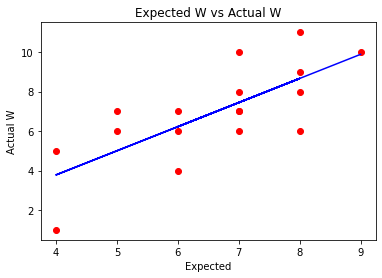

0.5050632911392405

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

X = np.array(teams_dict['Miami Dolphins']['Expected']).reshape(-1,1)
y = np.array(teams_dict['Miami Dolphins']['W']).reshape(-1,1)
regressor = LinearRegression()
regressor.fit(X,y)
y_pred = regressor.predict(X)

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Expected W vs Actual W')
plt.xlabel('Expected')
plt.ylabel('Actual W')
plt.show()

from sklearn.metrics import r2_score
coeff = r2_score(y, X)
coeff

We can see that there is some correlation in this teams case. With variation accounted for at about 50%.

# The Generalized Regression
Now that we've examined how the formula works for one NFL team, let's consider a more general regression fit, using the entire dataset we have available. In addition to this, we can actually change the exponent of the formula to make a more accurate prediction, this change varies from sport to sport, and incidentally seems to be based on the level of 'randomness' in a sports outcome. Online stats pros, Football Outsiders, uses the exponent of 2.37, which has been verified separately to be the most accurate exponent when applying our formula to the NFL. So for the sake of determining accuracy, our new 'expected' column will be calculated with this number.

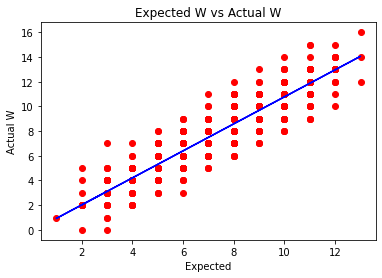

0.7896561010118243

In [30]:
for team in teams_dict:
    teams_dict[team]['Expected'] = (((teams_dict[team]['PF'])**2.37/(teams_dict[team]['PF']**2.37 + teams_dict[team]['PA']**2.37))*16).astype(int)
    
#From here we'll construct two arrays out of the cumulative columns 'expected' and 'wins' in our dataframe    
    
expected_list = []
wins_list = []

for team in teams_dict:
    expected_list += (teams_dict[team]['Expected']).tolist()
    wins_list += (teams_dict[team]['W'].tolist())

X = np.array(expected_list).reshape(-1,1)
y = np.array(wins_list).reshape(-1,1)

regressor = LinearRegression()
regressor.fit(X,y)
y_pred = regressor.predict(X)
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Expected W vs Actual W')
plt.xlabel('Expected')
plt.ylabel('Actual W')
plt.show()

coeff = r2_score(y, X)
coeff

We can see visually the correlation and even distribution of our formula's results. And our R2 score jumps up considerablly higher after accounting for all NFL teams and improving our exponent. 

An interesting observation (though we won't explore it in detail here) is that the actual outcome doesn't stray beyond 4 or 5 wins from the formula's prediction. An interest question to consider: Is this a result of the the 'nature' of NFL games or is there an underlying mathematical reason for this?

# Conclusion
Coming into this project, the question stated was: Will this formula be accurate at predicting NFL wins. After a short analysis, we have confirmed that this formula is accurate, at least when analyzing an entire dataset of all the involved teams. (Mileage may vary depending on which franchise we examine, sorry Miami Dolphins).

I'll add the comparison by point differential below to supplument our aside question for anyone interested. Though the differential is used to derive the Pythagorean Expectation, so the correlation shouldn't be substantially different.

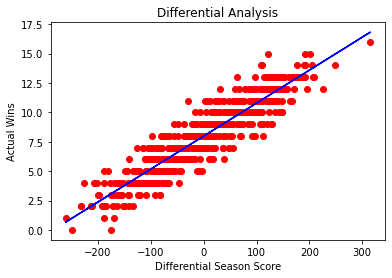

In [32]:
differential_list = []
for team in teams_dict:
    differential_list += (teams_dict[team]['PD']).tolist()

y = np.array(wins_list).reshape(-1,1)
X = np.array(differential_list).reshape(-1,1)

regressor = LinearRegression()
regressor.fit(X,y)
y_pred = regressor.predict(X)
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Differential Analysis')
plt.xlabel('Differential Season Score')
plt.ylabel('Actual Wins')
plt.show()